In [1]:
import pandas as pd
import pickle
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from datetime import date, timedelta

In [2]:

cabData = pd.read_csv('../DataSets/Cab_Data.csv')
cityData = pd.read_csv('../DataSets/City.csv')
customerData = pd.read_csv('../DataSets/Customer_ID.csv')
transactionData = pd.read_csv('../DataSets/Transaction_ID.csv')



In [3]:
cabData

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.6350
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.8540
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.6320
3,10000014,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.6020
4,10000015,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.7760
...,...,...,...,...,...,...,...
359387,10440101,43108,Yellow Cab,WASHINGTON DC,4.80,69.24,63.3600
359388,10440104,43104,Yellow Cab,WASHINGTON DC,8.40,113.75,106.8480
359389,10440105,43105,Yellow Cab,WASHINGTON DC,27.75,437.07,349.6500
359390,10440106,43105,Yellow Cab,WASHINGTON DC,8.80,146.19,114.0480


In [4]:
cabData['Transaction ID'].drop_duplicates()

0         10000011
1         10000012
2         10000013
3         10000014
4         10000015
            ...   
359387    10440101
359388    10440104
359389    10440105
359390    10440106
359391    10440107
Name: Transaction ID, Length: 359392, dtype: int64

In [5]:
cityData

,City,Population,Users
0,NEW YORK NY,"8,405,837","302,149"
1,CHICAGO IL,"1,955,130","164,468"
2,LOS ANGELES CA,"1,595,037","144,132"
3,MIAMI FL,"1,339,155","17,675"
4,SILICON VALLEY,"1,177,609","27,247"
5,ORANGE COUNTY,"1,030,185","12,994"
6,SAN DIEGO CA,"959,307","69,995"
7,PHOENIX AZ,"943,999","6,133"
8,DALLAS TX,"942,908","22,157"
9,ATLANTA GA,"814,885","24,701"


In [6]:
customerData

,Customer ID,Gender,Age,Income (USD/Month)
0,29290,Male,28,10813
1,27703,Male,27,9237
2,28712,Male,53,11242
3,28020,Male,23,23327
4,27182,Male,33,8536
...,...,...,...,...
49166,12490,Male,33,18713
49167,14971,Male,30,15346
49168,41414,Male,38,3960
49169,41677,Male,23,19454


In [7]:
customerData['Customer ID'].drop_duplicates()

0        29290
1        27703
2        28712
3        28020
4        27182
         ...  
49166    12490
49167    14971
49168    41414
49169    41677
49170    39761
Name: Customer ID, Length: 49171, dtype: int64

In [8]:
transactionData

,Transaction ID,Customer ID,Payment_Mode
0,10000011,29290,Card
1,10000012,27703,Card
2,10000013,28712,Cash
3,10000014,28020,Cash
4,10000015,27182,Card
...,...,...,...
440093,10440104,53286,Cash
440094,10440105,52265,Cash
440095,10440106,52175,Card
440096,10440107,52917,Card


In [9]:
transactionData['Transaction ID'].drop_duplicates()

0         10000011
1         10000012
2         10000013
3         10000014
4         10000015
            ...   
440093    10440104
440094    10440105
440095    10440106
440096    10440107
440097    10440108
Name: Transaction ID, Length: 440098, dtype: int64

In [10]:
cab_transactionData = cabData.merge(right=transactionData, how='outer', on='Transaction ID').sort_values(by='Transaction ID')

In [11]:
cab_transactionData

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode
0,10000011,42377.0,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,29290,Card
1,10000012,42375.0,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,27703,Card
2,10000013,42371.0,Pink Cab,ATLANTA GA,9.04,125.20,97.6320,28712,Cash
3,10000014,42376.0,Pink Cab,ATLANTA GA,33.17,377.40,351.6020,28020,Cash
4,10000015,42372.0,Pink Cab,ATLANTA GA,8.73,114.62,97.7760,27182,Card
...,...,...,...,...,...,...,...,...,...
359388,10440104,43104.0,Yellow Cab,WASHINGTON DC,8.40,113.75,106.8480,53286,Cash
359389,10440105,43105.0,Yellow Cab,WASHINGTON DC,27.75,437.07,349.6500,52265,Cash
359390,10440106,43105.0,Yellow Cab,WASHINGTON DC,8.80,146.19,114.0480,52175,Card
359391,10440107,43102.0,Yellow Cab,WASHINGTON DC,12.76,191.58,177.6192,52917,Card


In [12]:
cab_trans_city = cab_transactionData.merge(right=cityData, how="left", on='City')

In [13]:
cab_trans_city

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Population,Users
0,10000011,42377.0,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,29290,Card,"814,885","24,701"
1,10000012,42375.0,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,27703,Card,"814,885","24,701"
2,10000013,42371.0,Pink Cab,ATLANTA GA,9.04,125.20,97.6320,28712,Cash,"814,885","24,701"
3,10000014,42376.0,Pink Cab,ATLANTA GA,33.17,377.40,351.6020,28020,Cash,"814,885","24,701"
4,10000015,42372.0,Pink Cab,ATLANTA GA,8.73,114.62,97.7760,27182,Card,"814,885","24,701"
...,...,...,...,...,...,...,...,...,...,...,...
440093,10440104,43104.0,Yellow Cab,WASHINGTON DC,8.40,113.75,106.8480,53286,Cash,"418,859","127,001"
440094,10440105,43105.0,Yellow Cab,WASHINGTON DC,27.75,437.07,349.6500,52265,Cash,"418,859","127,001"
440095,10440106,43105.0,Yellow Cab,WASHINGTON DC,8.80,146.19,114.0480,52175,Card,"418,859","127,001"
440096,10440107,43102.0,Yellow Cab,WASHINGTON DC,12.76,191.58,177.6192,52917,Card,"418,859","127,001"


In [14]:
df = cab_trans_city.merge(right=customerData, how='left', on='Customer ID')

In [15]:
profit = df['Price Charged'] - df['Cost of Trip']

In [16]:
df.insert(loc=7, column='Profit', value=profit)

In [17]:
df.pop('Users')

0           24,701 
1           24,701 
2           24,701 
3           24,701 
4           24,701 
            ...    
440093     127,001 
440094     127,001 
440095     127,001 
440096     127,001 
440097          NaN
Name: Users, Length: 440098, dtype: object

In [18]:
def toDate(days):
    start = date(1900,1,1) 
    delta = timedelta(days)
    return start + delta

In [19]:
df.dropna(inplace=True)

In [20]:
df['DateTime'] = df['Date of Travel'].apply(lambda x: toDate(x))

In [21]:
df.drop(columns=['Date of Travel', 'Population'])

,Transaction ID,Company,City,KM Travelled,Price Charged,Cost of Trip,Profit,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),DateTime
0,10000011,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,57.3150,29290,Card,Male,28,10813,2016-01-10
1,10000012,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,23.6660,27703,Card,Male,27,9237,2016-01-08
2,10000013,Pink Cab,ATLANTA GA,9.04,125.20,97.6320,27.5680,28712,Cash,Male,53,11242,2016-01-04
3,10000014,Pink Cab,ATLANTA GA,33.17,377.40,351.6020,25.7980,28020,Cash,Male,23,23327,2016-01-09
4,10000015,Pink Cab,ATLANTA GA,8.73,114.62,97.7760,16.8440,27182,Card,Male,33,8536,2016-01-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...
440090,10440101,Yellow Cab,WASHINGTON DC,4.80,69.24,63.3600,5.8800,52392,Cash,Male,24,15651,2018-01-10
440093,10440104,Yellow Cab,WASHINGTON DC,8.40,113.75,106.8480,6.9020,53286,Cash,Male,32,6528,2018-01-06
440094,10440105,Yellow Cab,WASHINGTON DC,27.75,437.07,349.6500,87.4200,52265,Cash,Male,56,7966,2018-01-07
440095,10440106,Yellow Cab,WASHINGTON DC,8.80,146.19,114.0480,32.1420,52175,Card,Male,32,6423,2018-01-07


In [22]:

df[['KM Travelled', 'Date of Travel', 'Price Charged', 'Cost of Trip', 'Profit', 'Age', 'Income (USD/Month)']].describe()

,KM Travelled,Date of Travel,Price Charged,Cost of Trip,Profit,Age,Income (USD/Month)
count,359392.000000,359392.000000,359392.000000,359392.000000,359392.000000,359392.000000,359392.000000
mean,22.567254,42964.067998,423.443311,286.190113,137.253198,35.336705,15048.822937
std,12.233526,307.467197,274.378911,157.993661,160.311840,12.594234,7969.409482
min,1.900000,42371.000000,15.600000,19.000000,-220.060000,18.000000,2000.000000
25%,12.000000,42697.000000,206.437500,151.200000,28.012000,25.000000,8424.000000
50%,22.440000,42988.000000,386.360000,282.480000,81.962000,33.000000,14685.000000
75%,32.960000,43232.000000,583.660000,413.683200,190.030000,42.000000,21035.000000
max,48.000000,43465.000000,2048.030000,691.200000,1463.966000,65.000000,35000.000000


In [23]:
pf = df.loc[df['Company'] == "Pink Cab"]

In [24]:
yf = df.loc[df['Company'] == "Yellow Cab"]

In [25]:
pf[['KM Travelled', 'Price Charged', 'Cost of Trip', 'Profit', 'Age', 'Income (USD/Month)']].describe()

,KM Travelled,Price Charged,Cost of Trip,Profit,Age,Income (USD/Month)
count,84711.000000,84711.000000,84711.000000,84711.000000,84711.000000,84711.000000
mean,22.559917,310.800856,248.148682,62.652174,35.322414,15059.047137
std,12.231092,181.995661,135.403345,77.590378,12.644780,7991.077762
min,1.900000,15.600000,19.000000,-220.060000,18.000000,2000.000000
25%,12.000000,159.970000,131.868000,11.206000,25.000000,8371.000000
50%,22.440000,298.060000,246.330000,41.500000,33.000000,14713.000000
75%,32.960000,441.505000,360.180000,93.965000,42.000000,21055.000000
max,48.000000,1623.480000,576.000000,1119.480000,65.000000,35000.000000


In [26]:
yf[['KM Travelled', 'Price Charged', 'Cost of Trip', 'Profit', 'Age', 'Income (USD/Month)']].describe()

,KM Travelled,Price Charged,Cost of Trip,Profit,Age,Income (USD/Month)
count,274681.000000,274681.000000,274681.000000,274681.000000,274681.000000,274681.000000
mean,22.569517,458.181990,297.922004,160.259986,35.341112,15045.669817
std,12.234298,288.386166,162.548986,171.823833,12.578625,7962.727062
min,1.900000,20.730000,22.800000,-176.930800,18.000000,2000.000000
25%,11.990000,226.680000,158.400000,37.180000,25.000000,8439.000000
50%,22.440000,425.060000,295.596000,102.000000,33.000000,14676.000000
75%,32.960000,633.880000,432.432000,228.670400,42.000000,21023.000000
max,48.000000,2048.030000,691.200000,1463.966000,65.000000,34996.000000


In [27]:
bins = range(-200, 1000, 50)

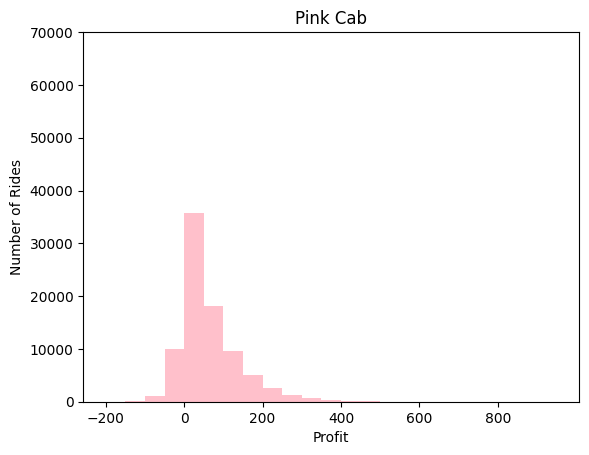

In [28]:
plt.hist(pf['Profit'], bins=bins, color='pink')
plt.xticks(bins[::4])
plt.ylim(0, 70000)

plt.title('Pink Cab')
plt.xlabel('Profit')
plt.ylabel('Number of Rides')
plt.show()


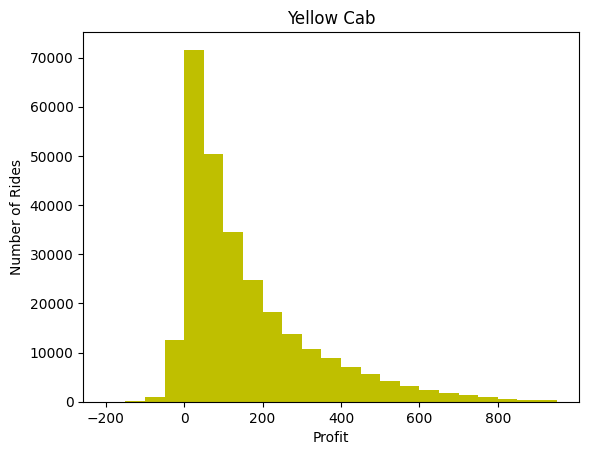

In [29]:
plt.hist(yf['Profit'], bins=bins, color='y')
plt.xticks(bins[::4])

plt.title('Yellow Cab')
plt.xlabel('Profit')
plt.ylabel('Number of Rides')
plt.show()

# Research Questions 

> Per city, how many transactions has each company made? 

> Per fiscal quarter, how many transactions has each company made? 
    
 * By gender, age, salary

> What is the total profit for each company per fiscal quarter? 

> What is the total profit for each company per year? 

> What are the profit margins compared to user salary? Do users' company choice depend on salary? 

* Use $cov(X, Y) = \mathbb{E}[(X - \mathbb{E}[X])(Y - \mathbb{E}[Y])]$ where $X$ is a random variable giving salary, $Y$ is a random variable giving profit. 

> How many users continually use each company? (User retention)

* By gender, age, salary

> What is the mean profit per ride for each company by fiscal quarter? 

> What are the projected profits in the upcoming fiscal quarters by location?

 * Use a linear regression
 * Implement a web-app predicting profit for each company by location and fiscal quarter.  

1. Per city, how many transactions has each company made? 

In [142]:
P_CountByCity = pf[['City', 'Transaction ID']].groupby(['City'], as_index=False).count()
Y_CountByCity = yf[['City', 'Transaction ID']].groupby(['City'], as_index=False).count()

In [158]:
P_CountByCity

,City,Transaction ID
0,ATLANTA GA,1762
1,AUSTIN TX,1868
2,BOSTON MA,5186
3,CHICAGO IL,9361
4,DALLAS TX,1380
5,DENVER CO,1394
6,LOS ANGELES CA,19865
7,MIAMI FL,2002
8,NASHVILLE TN,1841
9,NEW YORK NY,13967


In [159]:
Y_CountByCity

,City,Transaction ID
0,ATLANTA GA,5795
1,AUSTIN TX,3028
2,BOSTON MA,24506
3,CHICAGO IL,47264
4,DALLAS TX,5637
5,DENVER CO,2431
6,LOS ANGELES CA,28168
7,MIAMI FL,4452
8,NASHVILLE TN,1169
9,NEW YORK NY,85918


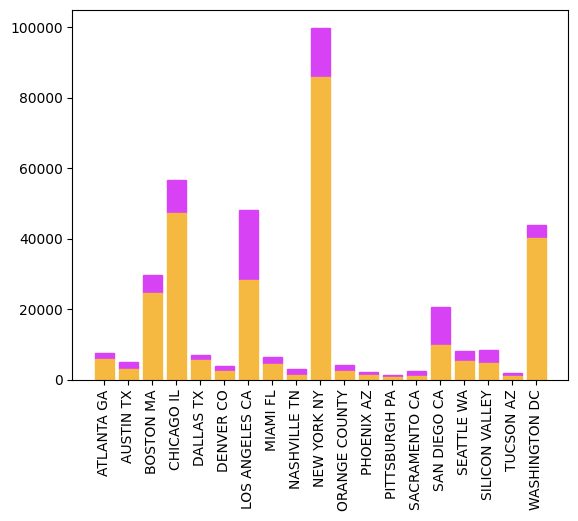

In [251]:

p = plt.bar(P_CountByCity['City'], P_CountByCity['Transaction ID'], bottom=Y_CountByCity['Transaction ID'])
y = plt.bar(Y_CountByCity['City'], Y_CountByCity['Transaction ID'] )
plt.xticks(rotation=90)

for bar in p:
    bar.set_color('#d742f5')

for bar in y:
    bar.set_color('#f5b942')
plt.show()


2. Per fiscal quarter, how many transactions has each company made? 
    
 * By gender, age, salary

In [203]:

def getQuarter(date: date):
    return (date.month - 1) // 3 + 1


In [252]:
def getTransactionsPerQuarterGender(d):
    CountByQ = d[['Transaction ID', 'Gender', 'DateTime']]
    CountByQ['Year'] = CountByQ['DateTime'].apply(lambda x: x.year)
    CountByQ['Quarter'] = CountByQ['DateTime'].apply(lambda x: getQuarter(x))
    CountByQ = CountByQ.groupby(['Year', 'Quarter', 'Gender'], as_index=False).count().drop(columns='DateTime')
    return CountByQ

In [ ]:
Y_CountByQG, P_CountByQG = getTransactionsPerQuarterGender(yf), getTransactionsPerQuarterGender(pf)

In [256]:
Y_CountByQG

,Year,Quarter,Gender,Transaction ID
0,2016,1,Female,4585
1,2016,1,Male,8753
2,2016,2,Female,7166
3,2016,2,Male,9748
4,2016,3,Female,9194
5,2016,3,Male,12522
6,2016,4,Female,12565
7,2016,4,Male,16866
8,2017,1,Female,7930
9,2017,1,Male,10306


In [257]:
P_CountByQG

,Year,Quarter,Gender,Transaction ID
0,2016,1,Female,1070
1,2016,1,Male,2084
2,2016,2,Female,2024
3,2016,2,Male,2480
4,2016,3,Female,3245
5,2016,3,Male,3951
6,2016,4,Female,4427
7,2016,4,Male,5559
8,2017,1,Female,2052
9,2017,1,Male,2481


In [282]:
pmd = P_CountByQG.loc[P_CountByQG['Gender'] == 'Male']
pfd = P_CountByQG.loc[P_CountByQG['Gender'] == 'Female']

In [ ]:
pmd['Abs Quarter'] = pmd['Year'].astype(str).str.cat(pmd['Quarter'].astype(str), sep='-')
pfd['Abs Quarter'] = pfd['Year'].astype(str).str.cat(pfd['Quarter'].astype(str), sep='-')

In [284]:
pmd

,Year,Quarter,Gender,Transaction ID,Abs Quarter
1,2016,1,Male,2084,2016-1
3,2016,2,Male,2480,2016-2
5,2016,3,Male,3951,2016-3
7,2016,4,Male,5559,2016-4
9,2017,1,Male,2481,2017-1
11,2017,2,Male,2922,2017-2
13,2017,3,Male,4769,2017-3
15,2017,4,Male,6661,2017-4
17,2018,1,Male,2819,2018-1
19,2018,2,Male,2734,2018-2


In [285]:
pfd

,Year,Quarter,Gender,Transaction ID,Abs Quarter
0,2016,1,Female,1070,2016-1
2,2016,2,Female,2024,2016-2
4,2016,3,Female,3245,2016-3
6,2016,4,Female,4427,2016-4
8,2017,1,Female,2052,2017-1
10,2017,2,Female,2299,2017-2
12,2017,3,Female,3782,2017-3
14,2017,4,Female,5335,2017-4
16,2018,1,Female,2296,2018-1
18,2018,2,Female,2237,2018-2


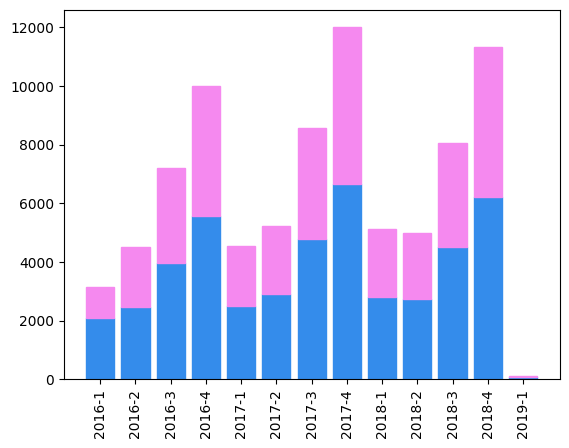

In [290]:
pm = plt.bar(pmd['Abs Quarter'], pmd['Transaction ID'])
pf = plt.bar(pfd['Abs Quarter'], pfd['Transaction ID'], bottom=pmd['Transaction ID'])



plt.xticks(rotation=90)

for bar in pm:
    bar.set_color('#348ceb')

for bar in pf:
    bar.set_color('#f589ef')


plt.show()


In [ ]:
def getTransactionsPerQuarterAge(d):
    CountByQ = d[['Transaction ID', 'Gender', 'DateTime']]
    CountByQ['Year'] = CountByQ['DateTime'].apply(lambda x: x.year)
    CountByQ['Quarter'] = CountByQ['DateTime'].apply(lambda x: getQuarter(x))
    CountByQ = CountByQ.groupby(['Year', 'Quarter', 'Gender'], as_index=False).count().drop(columns='DateTime')
    return CountByQ

In [ ]:
p = plt.bar(P_CountByCity['Year']['Quarter'], P_CountByCity['Transaction ID'].loc(P_CountByCity), bottom=Y_CountByCity['Transaction ID'])
y = plt.bar(Y_CountByCity['City'], Y_CountByCity['Transaction ID'] )
plt.xticks(rotation=90)

for bar in p:
    bar.set_color('#d742f5')

for bar in y:
    bar.set_color('#f5b942')
plt.show()